In [1]:
import tensorflow as tf
import pandas as pd

In [2]:
sess = tf.Session()
# Import data
df = pd.read_csv("LinearRegression.csv")

In [3]:
df.head()

,X,Y
0,6.2,29
1,9.5,44
2,10.5,36
3,7.7,37
4,8.6,53


In [12]:
# Parameters
learning_rate = 0.1
training_epochs = 10000
display_step = 1

In [5]:
# tf Graph Input
x = tf.placeholder(tf.float32, shape=(None,1)) 
y = tf.placeholder(tf.float32, shape=(None,1)) 

# Set model weights
W = tf.Variable(tf.random_normal([1,1]))
b = tf.Variable(tf.random_normal([1,1]))
print (x.get_shape().as_list())
print (W.get_shape().as_list())

[None, 1]
[1, 1]


In [6]:
# Construct model
logits = tf.matmul(x, W) + b ##this is linear regression
pred = tf.nn.softmax(logits) # Softmax , this is logistic regression

# Minimize error mean square error for linear regression
#cost_linear = tf.reduce_mean(tf.reduce_sum((tf.square(logits-y)),reduction_indices=1))
cost_linear = tf.losses.huber_loss(y,logits)

# Gradient Descent
optimizer_linear = tf.train.AdamOptimizer(learning_rate).minimize(cost_linear)

In [7]:
# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:
# no of correct prediction
correct_prediction = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
# Calculate accuracy
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [9]:
data_X = tf.constant(df["X"],shape=[42,1])
print (data_X.get_shape().as_list())
data_Y = tf.constant(df["Y"],shape=[42,1])
print (data_Y.get_shape().as_list())
sess.run(data_X)
data = data_X.eval(session=sess)
sess.run(data_Y)
label = data_Y.eval(session=sess)

[42, 1]
[42, 1]


In [10]:
data.shape,label.shape

((42, 1), (42, 1))

In [11]:
# Run the initializer
sess.run(init)

# Training cycle
for epoch in range(training_epochs):
    # Run optimization op (backprop) and cost op (to get loss value)
    _, c = sess.run([optimizer_linear, cost_linear], feed_dict={x:data, y:label})
    # Display logs per epoch step
    if (epoch+1) % display_step == 0:
        print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))
        #acc = sess.run(accuracy,feed_dict = {x: data, y: label})
        #print (acc)
        ##print("Accuracy:", acc.eval(sesion = sess)
print("Optimization Finished!")

NameError: name 'display_step' is not defined

In [58]:
import numpy as np
dataT = np.transpose(data)
labelT = np.transpose(label)

In [59]:
weight = W.eval(session=sess)
bias = b.eval(session=sess)
print (weight.shape)
print (bias.shape)
print (weight)
print (bias)

(1, 1)
(1, 1)
[[ 1.31345809]]
[[ 16.99511719]]


In [60]:
import matplotlib.pyplot as plt

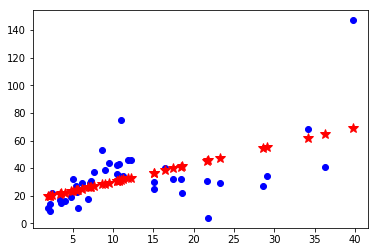

In [61]:
plt.plot(dataT, labelT, 'bo', label='Actual data')
plt.plot(dataT,dataT*weight+bias,color='red', linestyle='solid', marker='*',markerfacecolor='red', markersize=10)
#plt.legend()
plt.show()

In [62]:
dataT*weight+bias

array([[ 25.13855731,  29.472969  ,  30.78642708,  27.10874444,
         28.29085672,  61.78403789,  31.44315612,  26.05797797,
         26.58336121,  36.82833427,  55.21674746,  19.88472497,
         24.48182827,  19.62203336,  20.2787624 ,  22.24894953,
         24.08779085,  19.88472497,  26.4520154 ,  36.82833427,
         38.66717559,  41.16274595,  64.54229987,  69.13940316,
         41.29409176,  47.59869057,  33.01930583,  24.35048246,
         45.62850344,  45.36581182,  28.81623995,  21.72356629,
         23.56240761,  54.56001842,  39.84928787,  31.83719355,
         21.46087468,  32.6252684 ,  30.78642708,  31.0491187 ,
         31.18046451,  23.299716  ]])

In [63]:
labelT

array([[ 29,  44,  36,  37,  53,  68,  75,  18,  31,  25,  34,  14,  11,
         11,  22,  16,  27,   9,  29,  30,  40,  32,  41, 147,  22,  29,
         46,  23,   4,  31,  39,  15,  32,  27,  32,  34,  17,  46,  42,
         43,  34,  19]])

In [64]:
dataT

array([[  6.2,   9.5,  10.5,   7.7,   8.6,  34.1,  11. ,   6.9,   7.3,
         15.1,  29.1,   2.2,   5.7,   2. ,   2.5,   4. ,   5.4,   2.2,
          7.2,  15.1,  16.5,  18.4,  36.2,  39.7,  18.5,  23.3,  12.2,
          5.6,  21.8,  21.6,   9. ,   3.6,   5. ,  28.6,  17.4,  11.3,
          3.4,  11.9,  10.5,  10.7,  10.8,   4.8]])